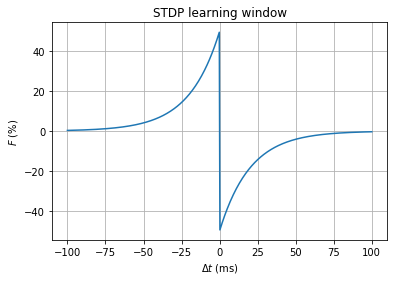

In [4]:
from pylab import *
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

tau = 20

A_plus, A_minus = (50, 50)

t = np.linspace(-100, 100, 500)

F = A_plus*np.exp(t[t < 0]/tau)
F = np.append(F, -A_minus*np.exp(-t[t >= 0]/tau))

plt.plot(t, F)
plt.title('STDP learning window')
plt.ylabel('$F$ (%)')
plt.xlabel('$\Delta t$ (ms)')
plt.grid()
plt.savefig('stdp_window.pdf')

In [68]:
print(t[t <= 0])

[-100.          -99.33110368  -98.66220736  -97.99331104  -97.32441472
  -96.65551839  -95.98662207  -95.31772575  -94.64882943  -93.97993311
  -93.31103679  -92.64214047  -91.97324415  -91.30434783  -90.63545151
  -89.96655518  -89.29765886  -88.62876254  -87.95986622  -87.2909699
  -86.62207358  -85.95317726  -85.28428094  -84.61538462  -83.94648829
  -83.27759197  -82.60869565  -81.93979933  -81.27090301  -80.60200669
  -79.93311037  -79.26421405  -78.59531773  -77.9264214   -77.25752508
  -76.58862876  -75.91973244  -75.25083612  -74.5819398   -73.91304348
  -73.24414716  -72.57525084  -71.90635452  -71.23745819  -70.56856187
  -69.89966555  -69.23076923  -68.56187291  -67.89297659  -67.22408027
  -66.55518395  -65.88628763  -65.2173913   -64.54849498  -63.87959866
  -63.21070234  -62.54180602  -61.8729097   -61.20401338  -60.53511706
  -59.86622074  -59.19732441  -58.52842809  -57.85953177  -57.19063545
  -56.52173913  -55.85284281  -55.18394649  -54.51505017  -53.84615385
  -53.1